1.  Loading Data and Observing It:

In [25]:
# Importing necessary libraries
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

In [26]:
# Loading MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Checking the shape of labels
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of y_test: {y_test.shape}')
print(f'Shape of x_train: {x_train.shape}')
print(f'Shape of x_test: {x_test.shape}')

Shape of y_train: (60000,)
Shape of y_test: (10000,)
Shape of x_train: (60000, 28, 28)
Shape of x_test: (10000, 28, 28)


In [27]:
# Normalizing the images (scaling pixels between 0 and 1)
x_train = x_train / 255.0
x_test = x_test / 255.0

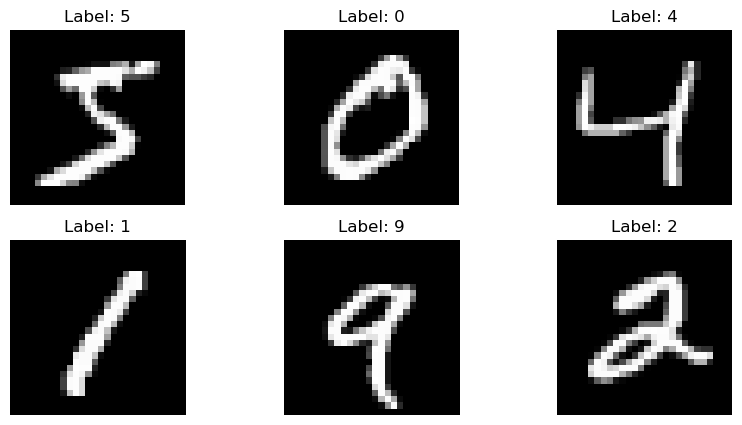

In [28]:
# Displaying a few sample images
plt.figure(figsize=(10, 5))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f'Label: {y_train[i]}')
    plt.axis('off')
plt.show()

2. Model Construction:

In [30]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Input

# Building the model
model = Sequential([
    Input(shape=(28, 28)),  # Explicitly defining the input shape
    Flatten(),  # Flattening the 28x28 images into vectors
    Dense(256, activation='relu'),  # First hidden layer with 256 neurons
    Dense(128, activation='relu'),  # Second hidden layer with 128 neurons
    Dense(10, activation='softmax')  # Output layer for classifying the 10 digits
])

# Compiling the model with Adam optimizer and sparse_categorical_crossentropy for integer labels
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Displaying the model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

3. Training and Evaluating the Model:

In [32]:
# Training the model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Evaluating the model on the test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8999 - loss: 0.3485 - val_accuracy: 0.9671 - val_loss: 0.1019
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9719 - loss: 0.0878 - val_accuracy: 0.9772 - val_loss: 0.0727
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9824 - loss: 0.0570 - val_accuracy: 0.9699 - val_loss: 0.1008
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9864 - loss: 0.0423 - val_accuracy: 0.9771 - val_loss: 0.0805
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9890 - loss: 0.0323 - val_accuracy: 0.9801 - val_loss: 0.0719
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9911 - loss: 0.0263 - val_accuracy: 0.9804 - val_loss: 0.0782
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9928 - loss: 0.0208 - val_accuracy: 0.9800 - val_loss: 0.0782
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9948 - loss: 0.0156 - 

4. Performance Analysis:

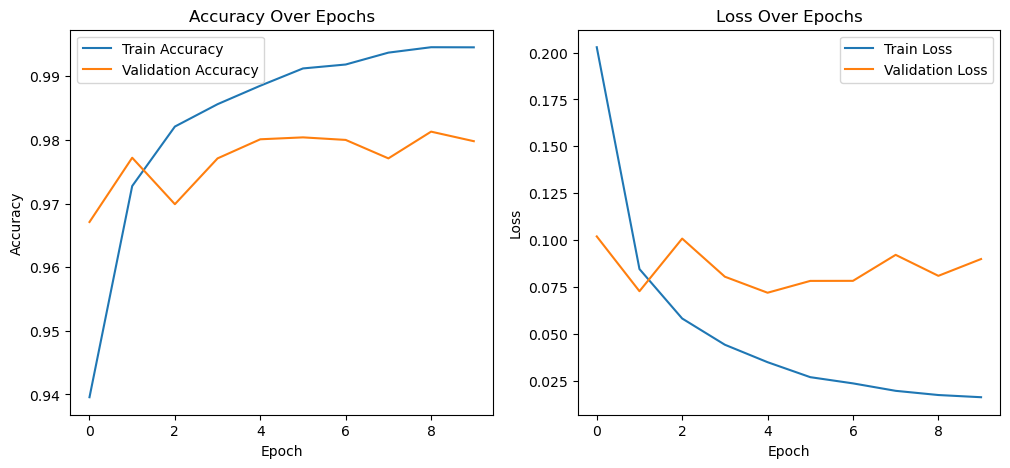

In [34]:
# Plotting accuracy during training
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plotting loss during training
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


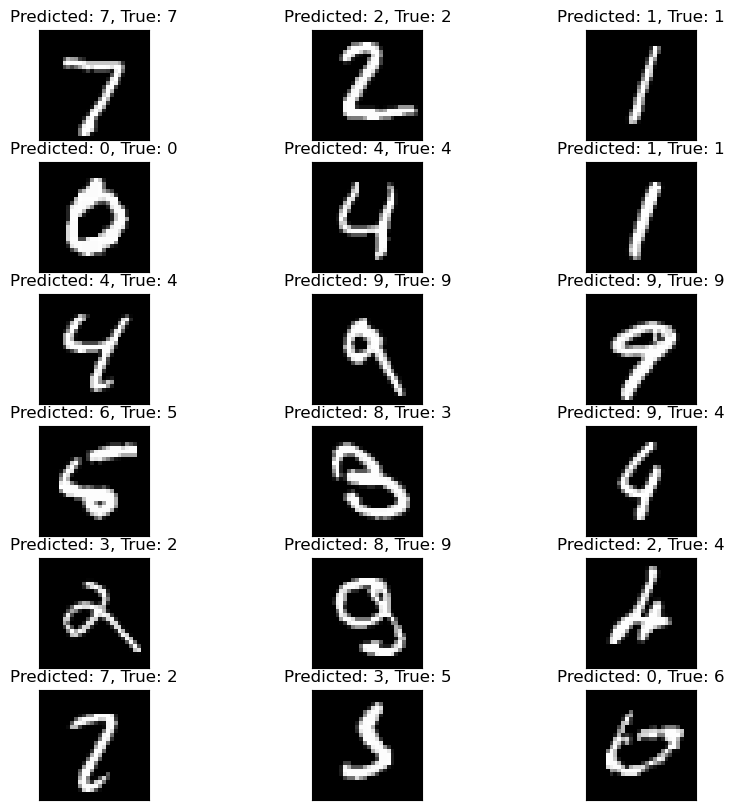

9798 classified correctly
202 classified incorrectly


In [35]:
# Making predictions on the test set
predicted_classes = model.predict(x_test)

# Indices of correct and incorrect predictions
correct_indices = np.nonzero(np.argmax(predicted_classes, axis=1) == y_test)[0]
incorrect_indices = np.nonzero(np.argmax(predicted_classes, axis=1) != y_test)[0]

# Displaying correctly classified examples
plt.figure(figsize=(10, 10))
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(6, 3, i + 1)
    plt.imshow(x_test[correct], cmap='gray')
    plt.title("Predicted: {}, True: {}".format(np.argmax(predicted_classes[correct]), y_test[correct]))
    plt.xticks([])
    plt.yticks([])

# Displaying incorrectly classified examples
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(6, 3, i + 10)
    plt.imshow(x_test[incorrect], cmap='gray', interpolation='none')
    plt.title("Predicted: {}, True: {}".format(np.argmax(predicted_classes[incorrect]), y_test[incorrect]))
    plt.xticks([])
    plt.yticks([])

plt.show()

# Performance summary
print(f"{len(correct_indices)} classified correctly")
print(f"{len(incorrect_indices)} classified incorrectly")

5. Hyperparameter Summary:

- Number of hidden layers: 2
- Neurons in the first hidden layer: 256
- Neurons in the second hidden layer: 128
- Output layer: 10 neurons
- Activation function in the output layer: softmax
- Activation function in hidden layers: ReLU
- Loss function: sparse_categorical_crossentropy
- Optimizer: Adam
- Learning rate: 0.001 (default)
- Training epochs: 10
- Batch size: 128 (default)

6. Conclusion:

A summary of the evaluation:

- Total test images: 10,000
- Correctly classified images: 98795
- Incorrectly classified images2 205
- Overall accuracy:897.95%

These results indicate that the model is able to classify most handwritten digits accurately, with a relatively low number of errors.